In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
plt.rcParams['savefig.dpi'] = 200 
plt.rcParams['figure.dpi'] = 200

# user_store distance

In [2]:
path = '/Volumes/GoogleDrive/My Drive/wish_local/fusion_package_breakdown/store_cannibalization/data'
user_store_dist = pd.read_csv(f'{path}/user_store_dist_5km_mx_02.csv')

In [3]:
user_store_dist.shape

(31619567, 4)

In [5]:
user_store_dist_dict = user_store_dist[['store_id', 'user_id', 'user_store_dist']\
                                    ].groupby('user_id').apply(\
                                    lambda x: x.set_index('store_id').to_dict(orient='index'))

# First mile id level 

In [6]:
dates = ['delivered_date']
df = pd.read_csv(\
'/Volumes/GoogleDrive/My Drive/wish_local/fusion_package_breakdown/store_cannibalization/data/m_transaction_id_mx_02.csv',\
parse_dates=dates, infer_datetime_format=True)

In [7]:
df.head()

,m_transaction_id,transaction_id,variation_id,product_id,store_id,store_order_id,country,combined_to,first_mile_tracking_id,delivered,delivered_date,user_id,orig_num_fm,logistics_profit_cny,last_combined_time,orig_user_store_dist
0,60009d1e6d4dce42e07ef906,60009d1c98e5de7aad6f2dd5,5c35f6f6de5790567319a514,5c35f6eede5790567319a507,5e3c91c74a3b21b05702ad85,60009d1d98e5de7aad6f2dd7,MX,MMXQP025708387R,WI001421894565EPC,1614531564,2021-02-28,5dfc5865ffd455288ee02aaf,6.0,4.467222,1.611731e+09,3.20
1,5ff3ce27b2c15602a5123d10,5ff3ce13ab0798286267a1fa,5d45c6a7ac3c8f134734bb11,5d45c69b58129b6eb7324e91,5df2b3b08cf3d42cc4082eb4,5ff3ce14ab0798286267a206,MX,MMXQP025452647R,WI001420828392EPC,1613185409,2021-02-12,5c285c55b9d9050dd872331d,16.0,11.070605,1.610349e+09,7.94
2,600ee9ef538496db13d52e34,600ee9e9ebbea9b72370a932,5e57767ac798524604b46581,5e5776747a0def46360d5fca,5da8fe4d567fca014822e07b,600ee9eaebbea9b72370a935,MX,MMXQP025805962R,WI001422425590EPC,1614546163,2021-02-28,5a7e755d900e9338372030c0,9.0,0.437624,1.612159e+09,16.66
3,5fff38b8c112d1038c39e6ea,5fff38ab5e6d478262e08a20,5d1c92129bcfd25dcf7f69a7,5d1c91f367df1d6833e2ae11,5e39eb085f6ba7098098e468,5fff38ac5e6d478262e08a25,MX,MMXQP025616249R,WI001421525716EPC,1613177905,2021-02-12,597be87345911a7cfb252b98,5.0,6.589318,1.611303e+09,2.51
4,5ff9a3cccae83d17c45bf109,5ff9a3ca7859c53eb828038d,5daeb3f991b7e40db1212aff,5daeb3ea35550b0dbee65792,5d02fde7d7f81715b7affe9d,5ff9a3ca7859c53eb828038f,MX,MMXQP025568804R,WI001421246115EPC,1612429636,2021-02-04,5a8c62041a8c69e0d4836587,8.0,0.771295,1.613923e+09,6.89


In [8]:
fm_tracking_id_profit = df.groupby('first_mile_tracking_id')['logistics_profit_cny'].sum().reset_index()
fm_tracking_id_profit.head()

,first_mile_tracking_id,logistics_profit_cny
0,WI001415557697EPC,-5.617349
1,WI001415574749EPC,-41.330730
2,WI001415602745EPC,-1.936552
3,WI001415705104EPC,-3.108113
4,WI001415706802EPC,-4.634595


In [9]:
fm_tracking_id_profit['logistics_profit_cny'].sum()

209741.49186658388

In [10]:
# to first mile tracking id level. 
df = df[['first_mile_tracking_id', 'store_id', 'combined_to', \
    'delivered', 'delivered_date', 'user_id', 'orig_num_fm',\
    'last_combined_time', 'orig_user_store_dist']].drop_duplicates()

In [12]:
df.isna().sum()

first_mile_tracking_id      4
store_id                    0
combined_to                 4
delivered                   0
delivered_date              0
user_id                     0
orig_num_fm                 4
last_combined_time          4
orig_user_store_dist      283
dtype: int64

In [13]:
df.describe(percentiles=[.25,.5,.75, .8, .85, .9, .95, .97, .99])

,delivered,orig_num_fm,last_combined_time,orig_user_store_dist
count,1.818610e+05,181857.000000,1.818570e+05,181578.00
mean,1.613545e+09,7.690334,1.611660e+09,inf
std,6.978217e+05,5.534138,1.215503e+06,NaN
min,1.612168e+09,1.000000,1.605932e+09,0.00
25%,1.612942e+09,3.000000,1.610867e+09,0.54
50%,1.613618e+09,6.000000,1.611731e+09,1.17
75%,1.614208e+09,11.000000,1.612332e+09,2.89
80%,1.614255e+09,12.000000,1.612591e+09,3.66
85%,1.614320e+09,13.000000,1.612764e+09,4.92
90%,1.614384e+09,15.000000,1.612764e+09,7.09


## remove NaNs and original user_store_dist > 20 km

In [14]:
df = df[~((df['combined_to'].isna()) |\
          (df['orig_user_store_dist'].isna()) | \
          (df['orig_user_store_dist']==np.inf) | \
          (df['orig_user_store_dist']>20))]

In [15]:
df.isna().sum()

first_mile_tracking_id    0
store_id                  0
combined_to               0
delivered                 0
delivered_date            0
user_id                   0
orig_num_fm               0
last_combined_time        0
orig_user_store_dist      0
dtype: int64

In [16]:
df.describe(percentiles=[.25,.5,.75, .8, .85, .9, .95, .97, .99])

,delivered,orig_num_fm,last_combined_time,orig_user_store_dist
count,1.772880e+05,177288.000000,1.772880e+05,177288.000000
mean,1.613546e+09,7.695992,1.611659e+09,2.296148
std,6.974759e+05,5.538032,1.213618e+06,3.043683
min,1.612168e+09,1.000000,1.605932e+09,0.000000
25%,1.612946e+09,3.000000,1.610867e+09,0.530000
50%,1.613618e+09,6.000000,1.611731e+09,1.120000
75%,1.614209e+09,11.000000,1.612332e+09,2.660000
80%,1.614257e+09,12.000000,1.612591e+09,3.340000
85%,1.614320e+09,13.000000,1.612764e+09,4.350000
90%,1.614384e+09,15.000000,1.612764e+09,6.010000


<AxesSubplot:>

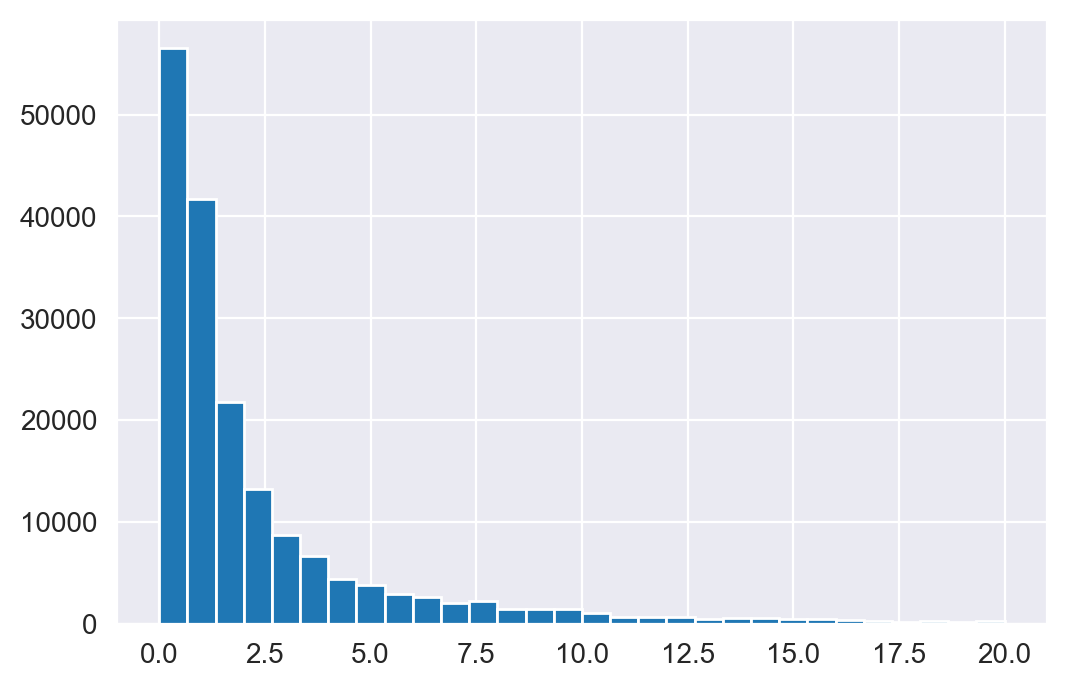

In [17]:
df['orig_user_store_dist'].hist(bins=30)

# Package level

In [18]:
pkg = df.groupby('combined_to').agg({\
                               'last_combined_time': [max],\
                               'delivered':[max],\
                               'delivered_date':[max],\
                               'store_id': [set],\
                               'orig_num_fm': [max],\
                               'first_mile_tracking_id':[list], \
                              })
pkg.columns = ['last_combined_time', 'delivered', 'delivered_date', 'store_id', 'orig_num_fm', 'first_mile_tracking_id_list']
pkg = pkg.reset_index()


In [19]:
# check with one combined_to maps to one store_id, correct
pkg['store_id'].apply(len).max()

1

In [20]:
pkg['store_id'] = pkg['store_id'].apply(lambda x: list(x)[0])

In [21]:
pkg.head()

,combined_to,last_combined_time,delivered,delivered_date,store_id,orig_num_fm,first_mile_tracking_id_list
0,MMXQP008439172R,1.609488e+09,1613185504,2021-02-12,5f0e500fc273869e25999f0e,1.0,[WI001416882074EPC]
1,MMXQP008447094R,1.612932e+09,1613092090,2021-02-11,5d65b4ecbff2df144c2ccca0,3.0,"[WI001415850203EPC, WI001415792372EPC, WI00141..."
2,MMXQP008447514R,1.613527e+09,1613708966,2021-02-18,5f2e5389f9d27a50fc5a0aaf,4.0,"[WI001416688243EPC, WI001417133316EPC, WI00141..."
3,MMXQP008451774R,1.605932e+09,1613539388,2021-02-16,5d6726288a2f062b92eafd9f,2.0,"[WI001416570598EPC, WI001416570624EPC]"
4,MMXQP008455569R,1.613749e+09,1612412503,2021-02-03,5d4cc3525575bf0b86b5f904,2.0,"[WI001417070355EPC, WI001415557697EPC]"


## check if orig_num_fm == first_mile_tracking_id_list
### It seems no, as we have removed first_mile_tracking_ids with orig_user_store_dist>20. We should still use orig_num_fm 

In [22]:
# check if orig_num_fm == first_mile_tracking_id_list
a = pkg['orig_num_fm'].sum()
b = pkg['first_mile_tracking_id_list'].apply(lambda x: len(set(x))).sum()
c = a-b
a,b,c

(185559.0, 177288, 8271.0)

In [23]:
pkg[pkg['orig_num_fm'] != pkg['first_mile_tracking_id_list'].apply(lambda x: len(set(x)))].shape

(2345, 7)

In [24]:
pkg[pkg['orig_num_fm'] != pkg['first_mile_tracking_id_list'].apply(lambda x: len(set(x)))].shape[0]/ pkg.shape[0]

0.0510804217129912

In [25]:
pkg[(pkg['orig_num_fm']==1)&(pkg['orig_num_fm'] != pkg['first_mile_tracking_id_list'].apply(\
                                                                            lambda x: len(set(x))))].shape

(0, 7)

# Test

In [32]:
def simulate_combination(df, pkg, user_store_dist_dict=user_store_dist_dict, \
                         delivered_time_window=(24, 24), last_combined_time_window=(24, 24), \
                         orig_dist_plus=1, max_dist=5):
    """
    df: first mile tracking id level
    pkg: combined_to level
    user_store_dist_dict: {user_id:
                                {store_id: {user_store_dist:, 
                                            user_id:},
                                },
                            }
    delivered_time_window: to control combination rule, window[0]<= delivered_time <= window[1]
    last_combined_time_window: to control combination rule, window[0]<= last_combined_time_time <= window[1]
    orig_dist_plus: to control nearby store rule, orig_user_store_dist ± orig_dist_plus
    max_dist: threshold to control not combining packages with orig_user_store_dist > max_dist. 
              for dist>max_dist, it is inaccurate to define orig_user_store_dist ± orig_dist_plus 
    """

    
    # reset _after columns
    df['num_fm_after'] = df['orig_num_fm'].values
    df['combined_to_after'] = df['combined_to'].values
    pkg['num_fm_after'] = pkg['orig_num_fm'].values
    
    # restructure package data into dictionary
    pkg_dict = pkg[['combined_to', 'last_combined_time', 'delivered', 'delivered_date', \
                'store_id', 'orig_num_fm', 'num_fm_after']\
                   ].groupby('store_id'\
                   ).apply(lambda x: x.set_index('combined_to').to_dict(orient='index'))
    
    # simulate
    
    #for i, order in df.iterrows(): # not okay to use iterrows or itertuples, as we want to change df during iteration. 
    for i in df.index:
        order = df.loc[i]
        if (order.num_fm_after == 1) and (order.orig_user_store_dist <= max_dist):

            close_stores = []
            if order.user_id in user_store_dist_dict:
                for k, v in user_store_dist_dict[order.user_id].items():
                    if (k!=order.store_id) and (\
                            v['user_store_dist']<=order.orig_user_store_dist+orig_dist_plus) and (\
                            v['user_store_dist']>=order.orig_user_store_dist-orig_dist_plus):
                        close_stores.append(k)
            else:
                continue

            # find packages that could have been combined with the order that delivered to a nearbly store
            combine_pkg = {'store_id': -1, 'combined_to': -1, 'num_fm_after': 1000}
            for s in close_stores: # s is store_id
                if s in pkg_dict:
                    for k, v in pkg_dict[s].items(): # k is combined_to
                        if ((k!=order.combined_to_after) and\
                            (order.last_combined_time>=v['last_combined_time']-last_combined_time_window[0]*3600) and \
                            (order.last_combined_time<=v['last_combined_time']+last_combined_time_window[1]*3600) and \
                            (order.delivered >= v['delivered']-delivered_time_window[0]*3600) and \
                            (order.delivered <= v['delivered']+delivered_time_window[1]*3600)):
                            if v['num_fm_after'] < combine_pkg['num_fm_after']:
                                combine_pkg = {'store_id': s, 'combined_to': k, 'num_fm_after': v['num_fm_after']}


            if combine_pkg['store_id'] != -1:
                # update package level data
                pkg_dict[combine_pkg['store_id']][combine_pkg['combined_to']]['num_fm_after'] += 1
                del pkg_dict[order.store_id][order.combined_to] # drop the old package
                
                # update order level data 
                df.loc[df[(df['combined_to_after']==combine_pkg['combined_to'])].index, 'num_fm_after'] = pkg_dict[combine_pkg['store_id']][combine_pkg['combined_to']]['num_fm_after']
                # test example:
#                 if i in [135, 19873, 91039, 61597, 149645]:
#                     print(df[(df['combined_to_after']==combine_pkg['combined_to'])].index, )
#                     print(df.loc[df[(df['combined_to_after']==combine_pkg['combined_to'])].index, ['first_mile_tracking_id', 'combined_to_after', 'num_fm_after']])
#                     print()
                df.loc[i, 'combined_to_after'] = combine_pkg['combined_to']
                df.loc[i, 'num_fm_after'] = pkg_dict[combine_pkg['store_id']][combine_pkg['combined_to']]['num_fm_after']

                #break
    params = f"""
    delivered_time_window={delivered_time_window}, 
    last_combined_time_window={last_combined_time_window}, 
    orig_dist_plus={orig_dist_plus}"""
    return df, params
                

    
    
    
def evaluate_results(df_after, params, remove_5km_under=False):
    '''
    df_after: first mile tracking id level after simulation
    remove_5km_under: whether to remove orig_user_store_dist > 5km.  
    '''
    print(params)
    with_5km_plus = len(df_after)
    if remove_5km_under:
        df_after = df_after[df_after['orig_user_store_dist']<=5]
        
    orig_num_fm_1 = len(df_after[df_after['orig_num_fm']==1])
    after_num_fm_1 = len(df_after[df_after['num_fm_after']==1])
    
    orig_num_lm = df_after['combined_to'].nunique()
    after_num_lm = df_after['combined_to_after'].nunique()
    
    
    results = f"""
    - For all orders delivered to MX in Jan 2021:
    - There are {with_5km_plus} first_mile_tracking_ids
    - Removing orders w/ user_store_distance>5km, there are {len(df_after)} first_mile_tracking_ids left. 
    - There are {orig_num_fm_1} first_mile_tracking_ids originally that were not combined, which is {round(orig_num_fm_1 / len(df_after)*100,2)}% of all fm_tracking_ids.
    - After the combination simulation, {orig_num_fm_1-after_num_fm_1} of them are combined with other first_mile_tracking_ids, and the % decreases to {round(after_num_fm_1 / len(df_after)*100,2)}%.
    - Total number of final packages decreased from {orig_num_lm} to {after_num_lm} ({round((1-after_num_lm/orig_num_lm)*100, 2)}% drop).
    """
    print(results)
    
    # plot the results
    import matplotlib.ticker as mtick
    fig, ax = plt.subplots(nrows=2, ncols=1,figsize=(10,14))
    (df_after.groupby('orig_num_fm')['first_mile_tracking_id'].count() / df_after.shape[0] * 100\
                                                                ).plot(kind='bar', ax=ax[0])
    ax[0].set_ylabel('% of total first mile packages')
    ax[0].yaxis.set_major_formatter(mtick.PercentFormatter())
    ax[0].set_title('Before simulation')
    
    (df_after.groupby('num_fm_after')['first_mile_tracking_id'].count() / df_after.shape[0] * 100\
                                                                ).plot(kind='bar',ax=ax[1])
    ax[1].set_ylabel('% of total first mile packages')
    ax[1].yaxis.set_major_formatter(mtick.PercentFormatter())
    ax[1].set_title('After simulation')
    
    
    

## Test 1


    delivered_time_window=(24, 24), 
    last_combined_time_window=(24, 24), 
    orig_dist_plus=1

    - For all orders delivered to MX in Jan 2021:
    - There are 177288 first_mile_tracking_ids
    - Removing orders w/ user_store_distance>5km, there are 177288 first_mile_tracking_ids left. 
    - There are 15049 first_mile_tracking_ids originally that were not combined, which is 8.49% of all fm_tracking_ids.
    - After the combination simulation, 9255 of them are combined with other first_mile_tracking_ids, and the % decreases to 3.27%.
    - Total number of final packages decreased from 45908 to 39793 (13.32% drop).
    


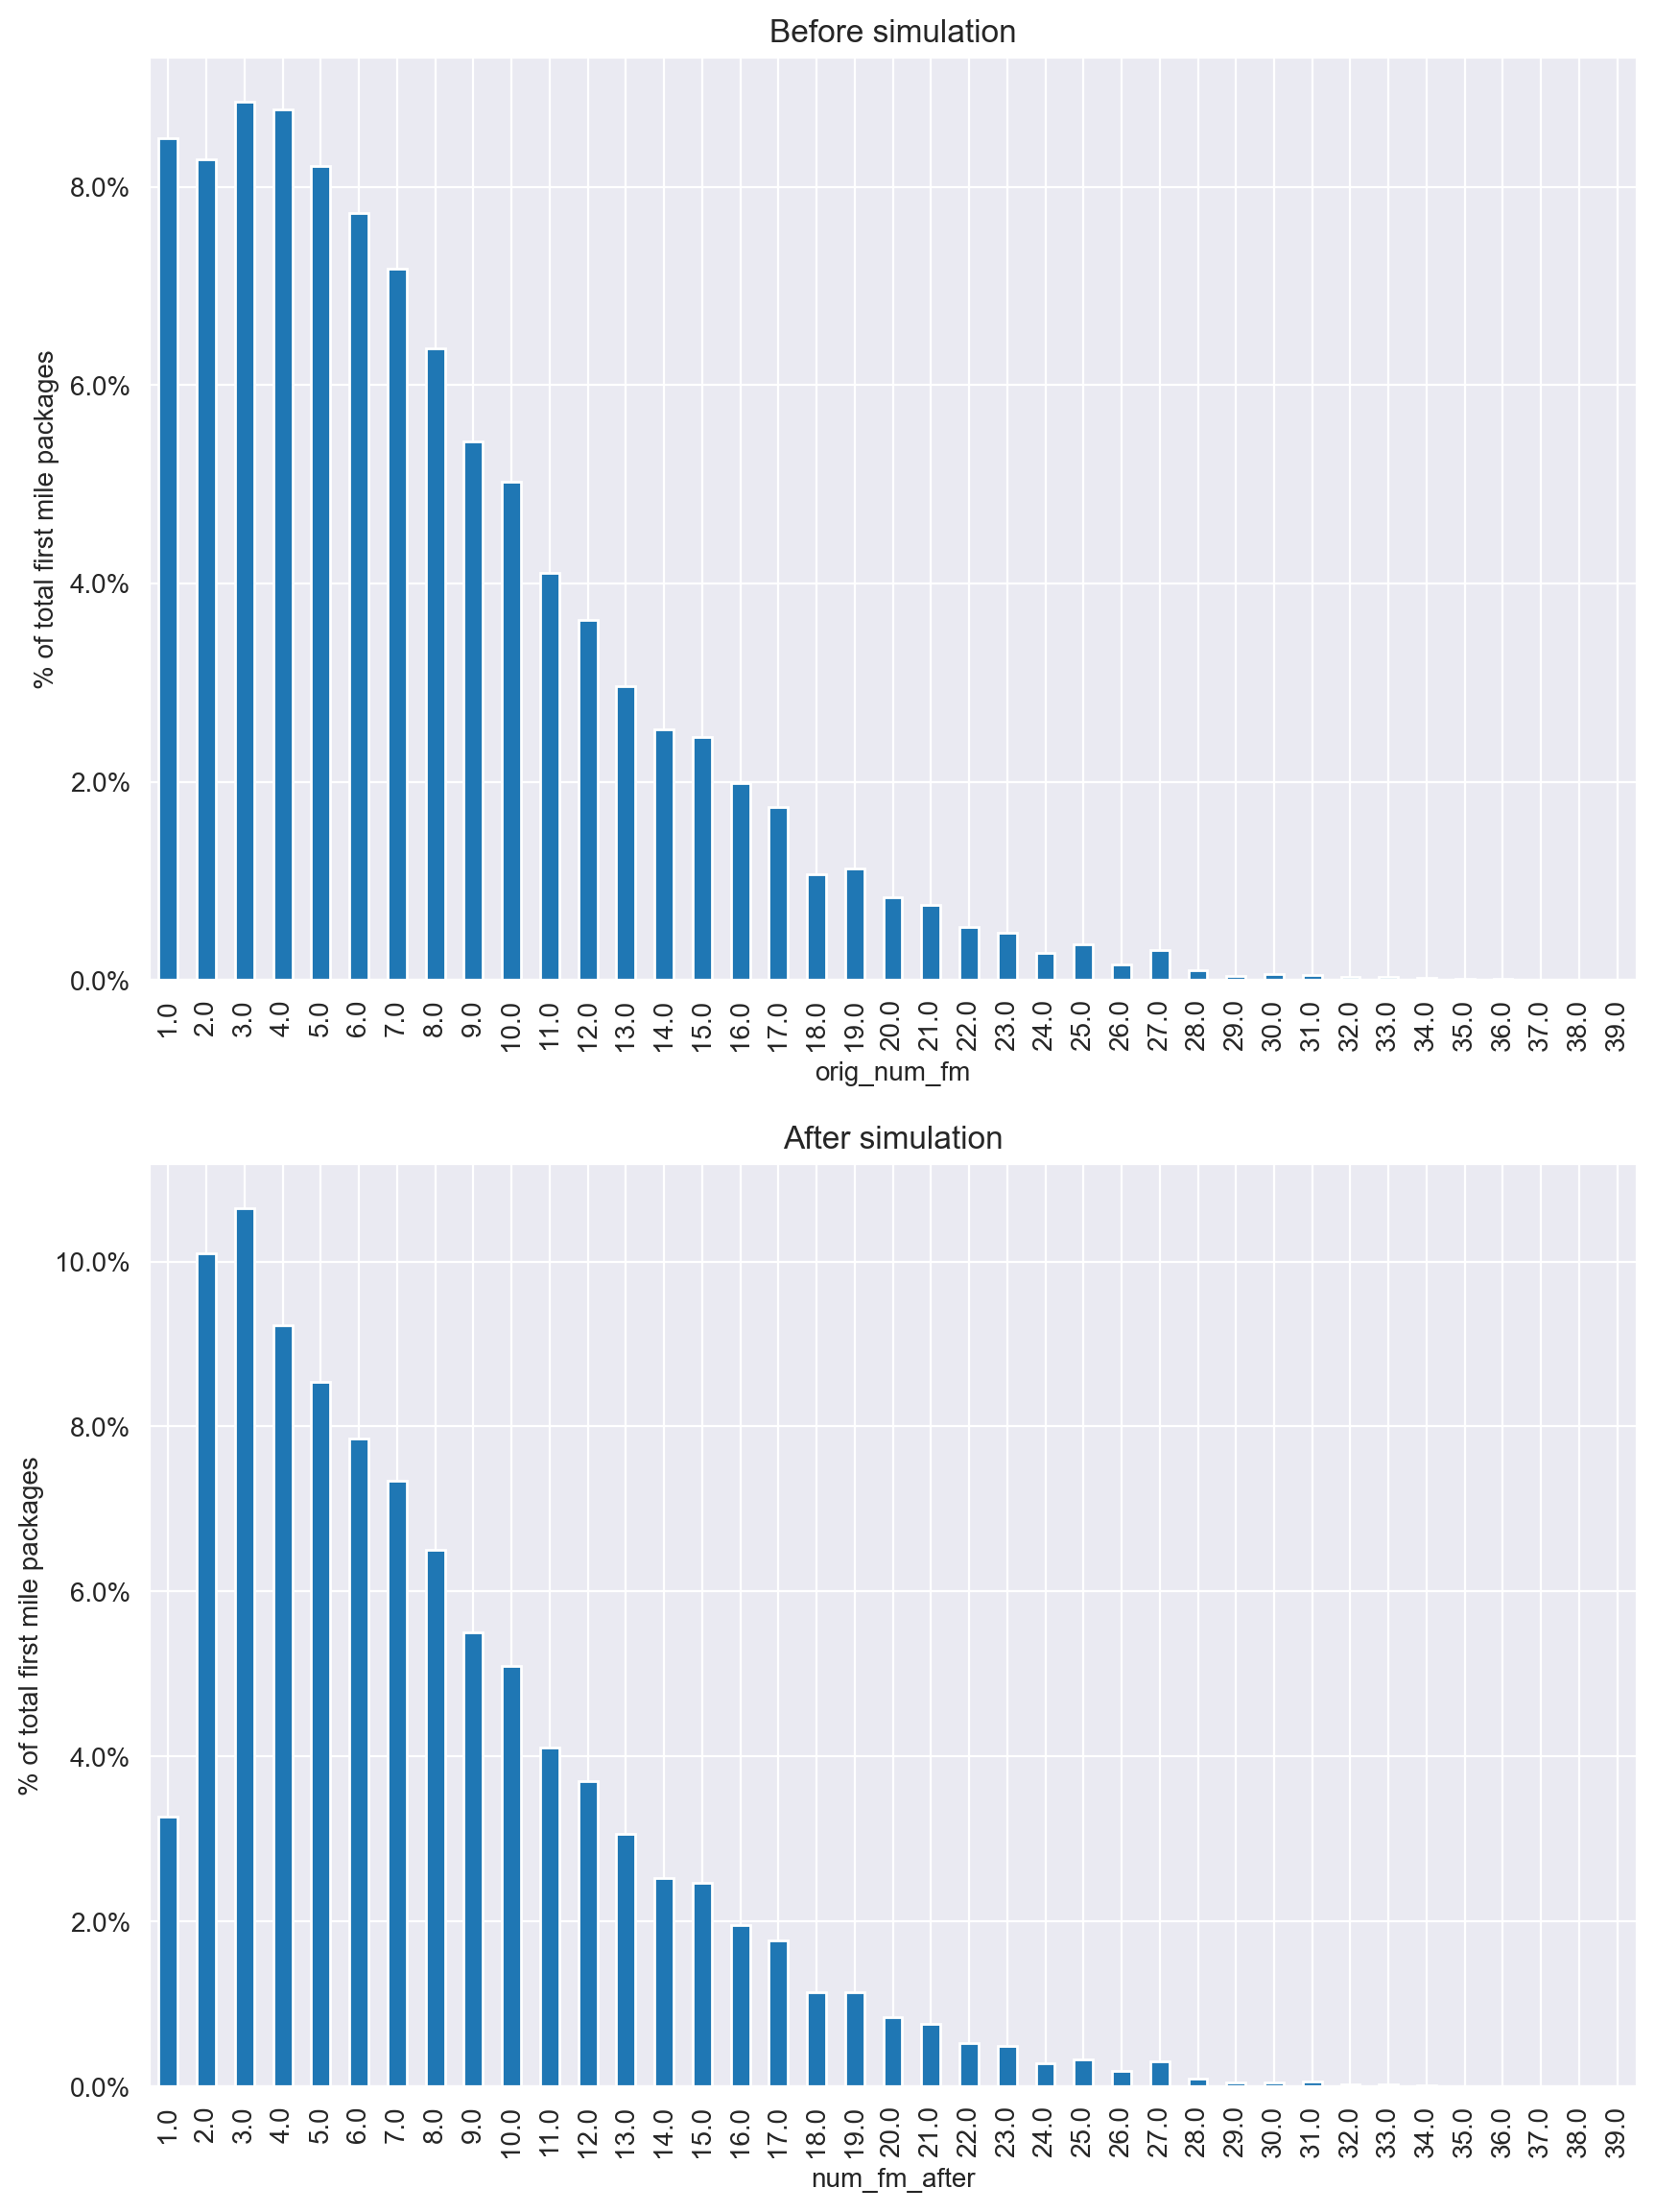

In [33]:
# Test 1
df_after_1, params_1 = simulate_combination(df=df.copy(deep=True), pkg=pkg.copy(deep=True))
evaluate_results(df_after_1, params_1)
    

## Test 2 - to compare with test1: shuffling the dataset changes the results a little.  


    delivered_time_window=(24, 24), 
    last_combined_time_window=(24, 24), 
    orig_dist_plus=1

    - For all orders delivered to MX in Jan 2021:
    - There are 177288 first_mile_tracking_ids
    - Removing orders w/ user_store_distance>5km, there are 177288 first_mile_tracking_ids left. 
    - There are 15049 first_mile_tracking_ids originally that were not combined, which is 8.49% of all fm_tracking_ids.
    - After the combination simulation, 9233 of them are combined with other first_mile_tracking_ids, and the % decreases to 3.28%.
    - Total number of final packages decreased from 45908 to 39828 (13.24% drop).
    


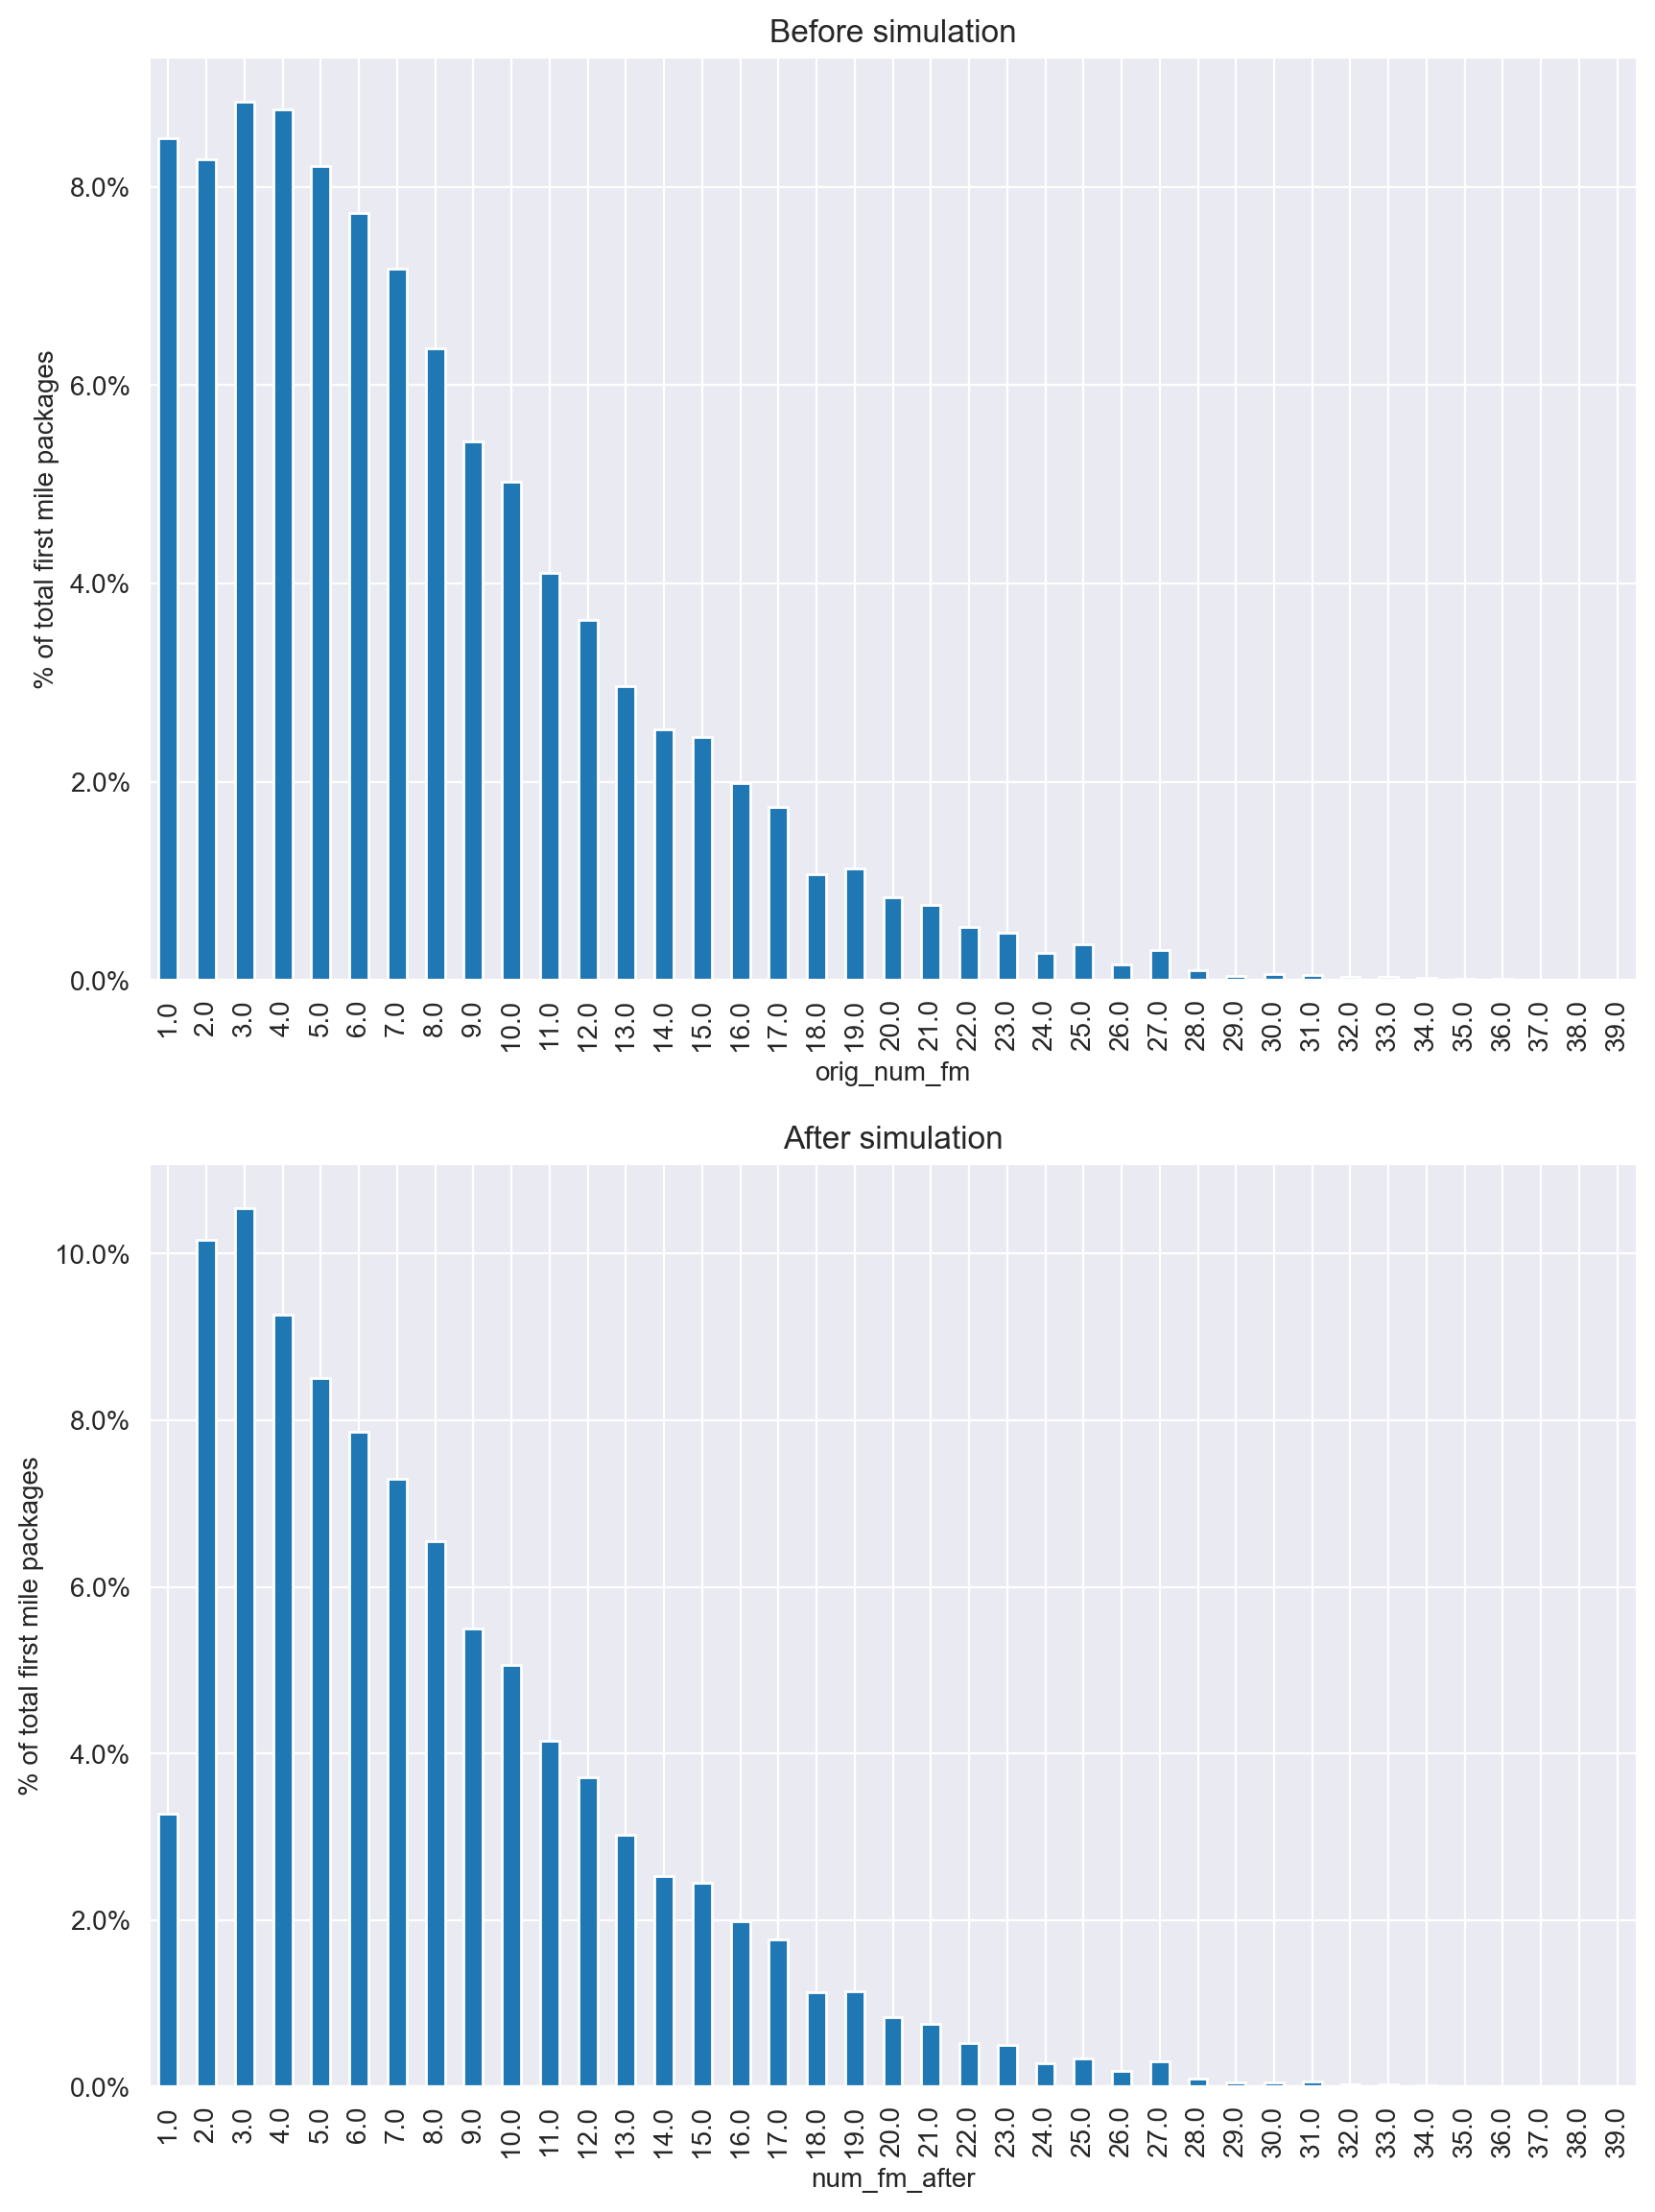

In [34]:
df_before = df.copy(deep=True).sample(frac=1)
df_after_shuffled, params = simulate_combination(df=df_before, pkg=pkg.copy(deep=True))
evaluate_results(df_after_shuffled, params)

## Test 3


    delivered_time_window=(24, 24), 
    last_combined_time_window=(24, 24), 
    orig_dist_plus=0.5

    - For all orders delivered to MX in Jan 2021:
    - There are 177288 first_mile_tracking_ids
    - Removing orders w/ user_store_distance>5km, there are 177288 first_mile_tracking_ids left. 
    - There are 15049 first_mile_tracking_ids originally that were not combined, which is 8.49% of all fm_tracking_ids.
    - After the combination simulation, 7673 of them are combined with other first_mile_tracking_ids, and the % decreases to 4.16%.
    - Total number of final packages decreased from 45908 to 40682 (11.38% drop).
    


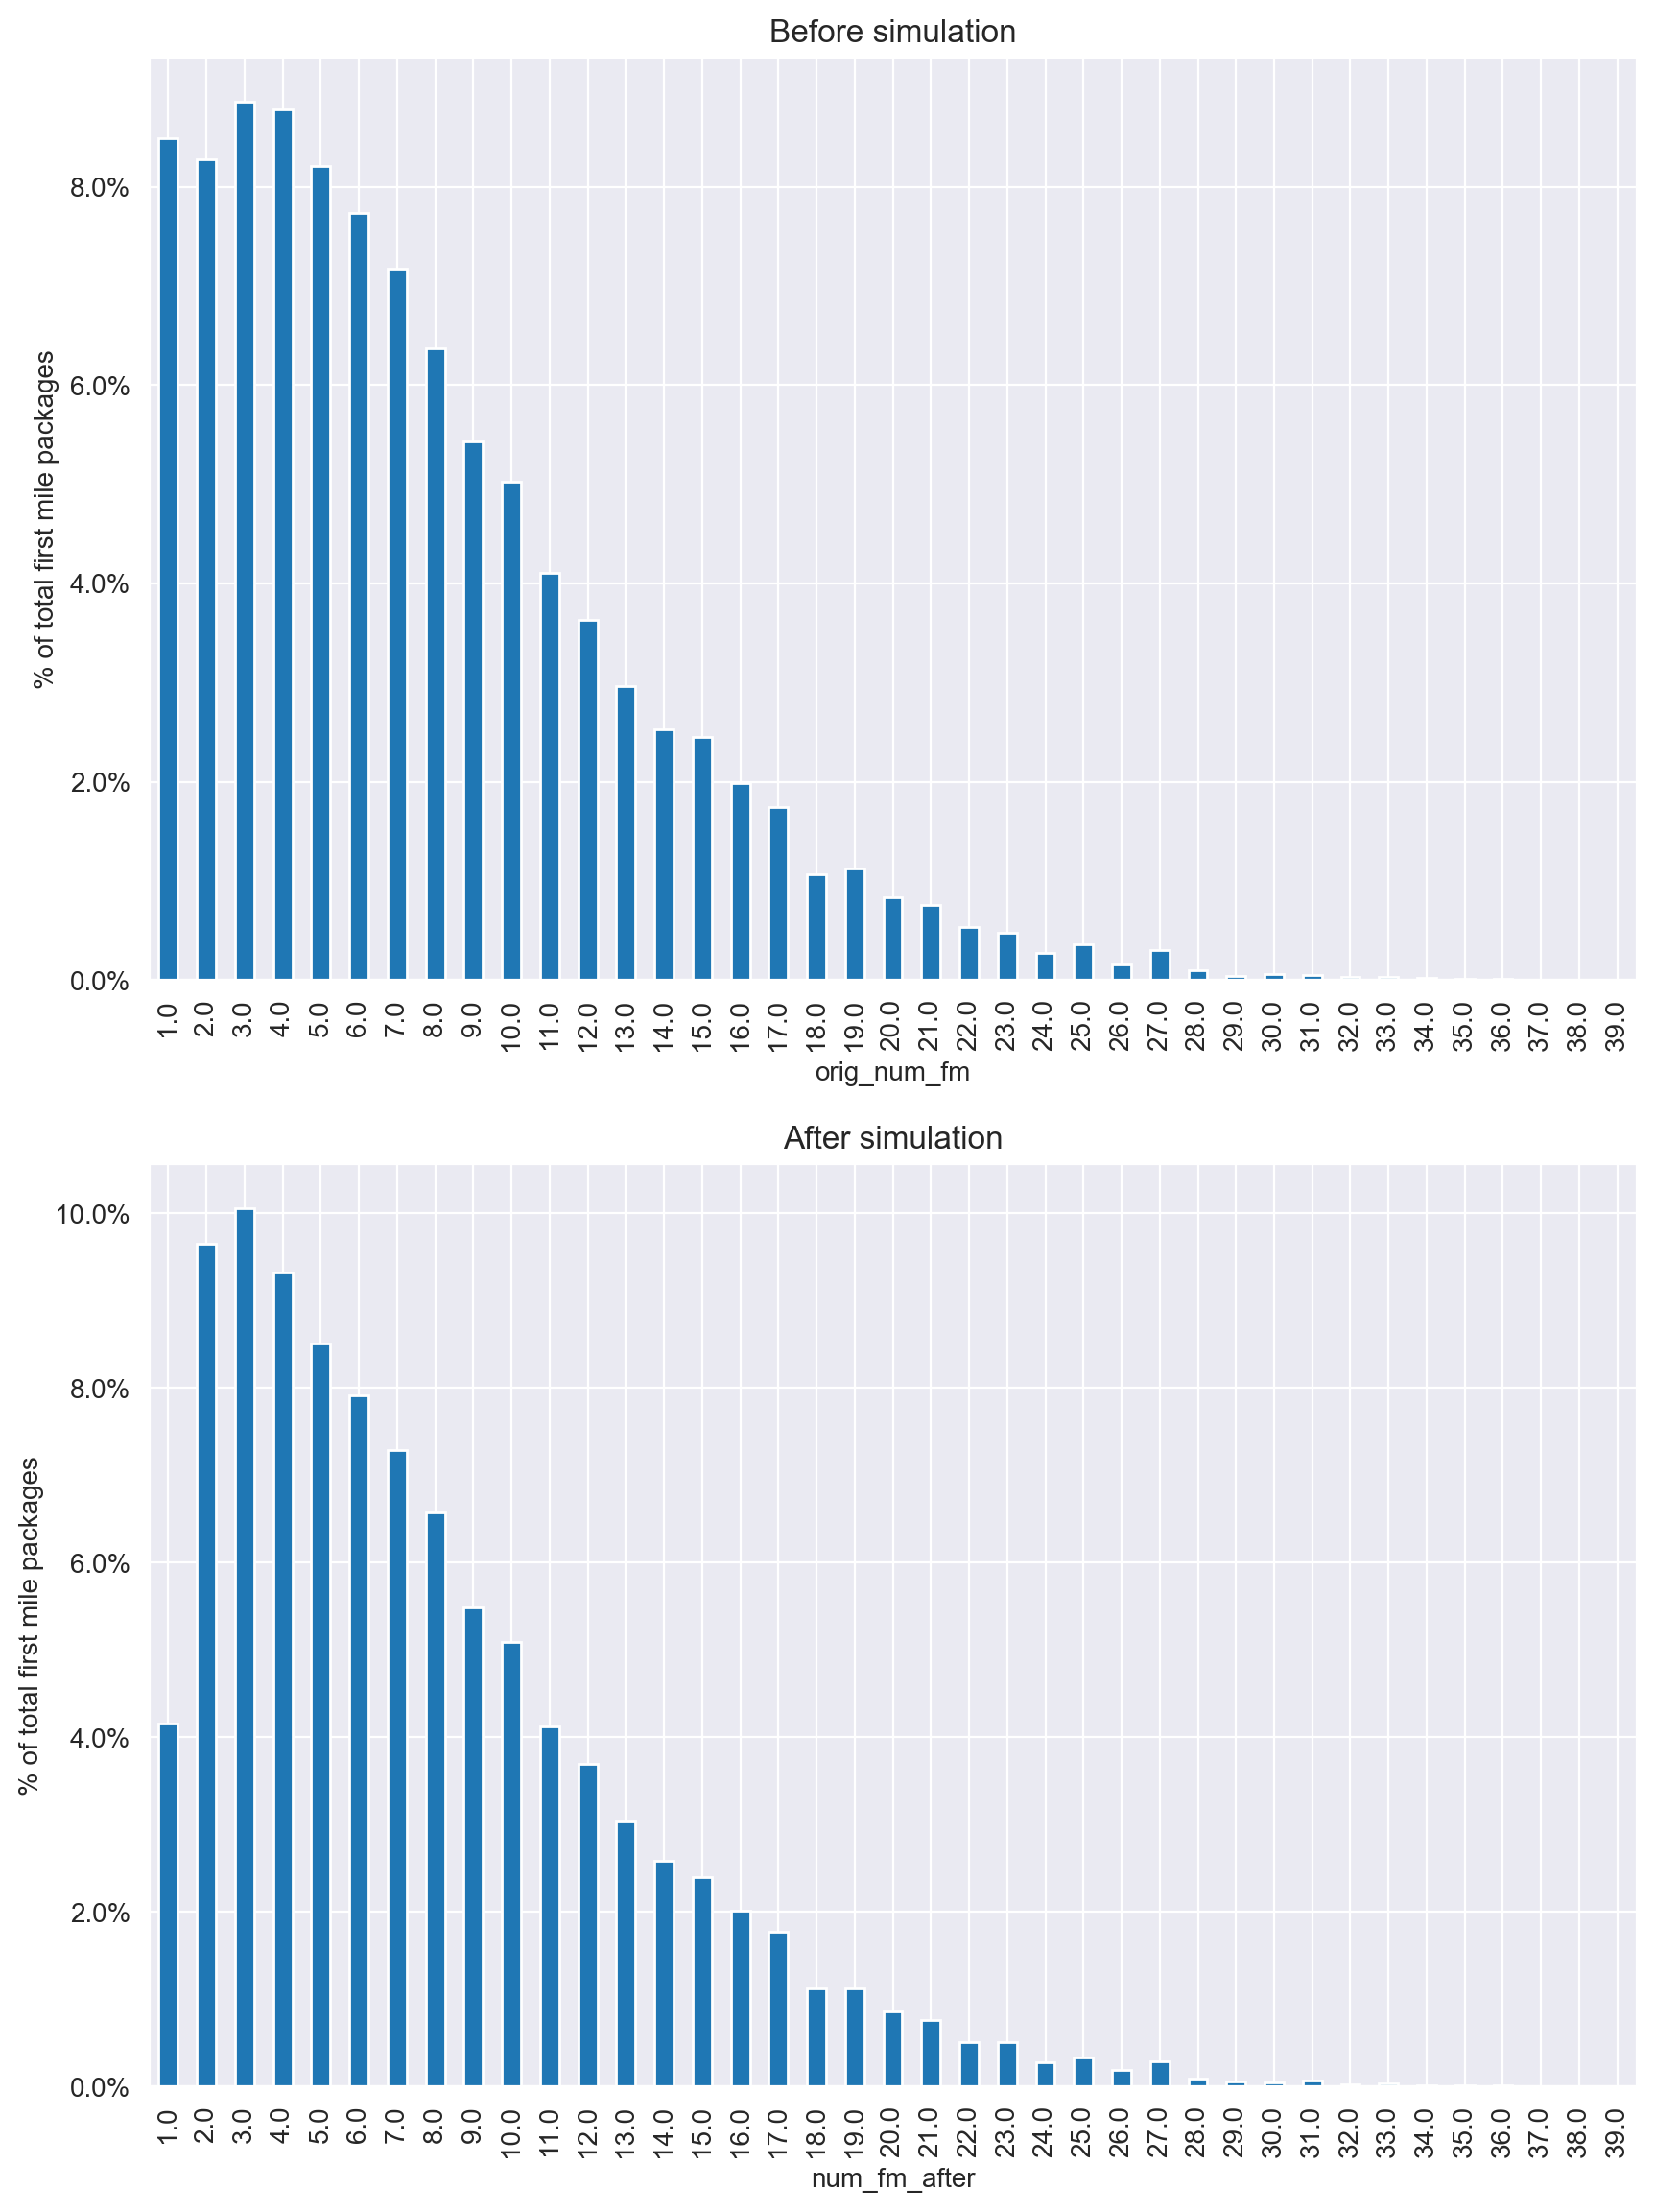

In [35]:

df_after_2, params_2 = simulate_combination(df=df.copy(deep=True), pkg=pkg.copy(deep=True),\
                                        orig_dist_plus=0.5)
evaluate_results(df_after_2, params_2)
    

## Test 4


    delivered_time_window=(12, 12), 
    last_combined_time_window=(12, 12), 
    orig_dist_plus=0.5

    - For all orders delivered to MX in Jan 2021:
    - There are 177288 first_mile_tracking_ids
    - Removing orders w/ user_store_distance>5km, there are 177288 first_mile_tracking_ids left. 
    - There are 15049 first_mile_tracking_ids originally that were not combined, which is 8.49% of all fm_tracking_ids.
    - After the combination simulation, 5443 of them are combined with other first_mile_tracking_ids, and the % decreases to 5.42%.
    - Total number of final packages decreased from 45908 to 42143 (8.2% drop).
    


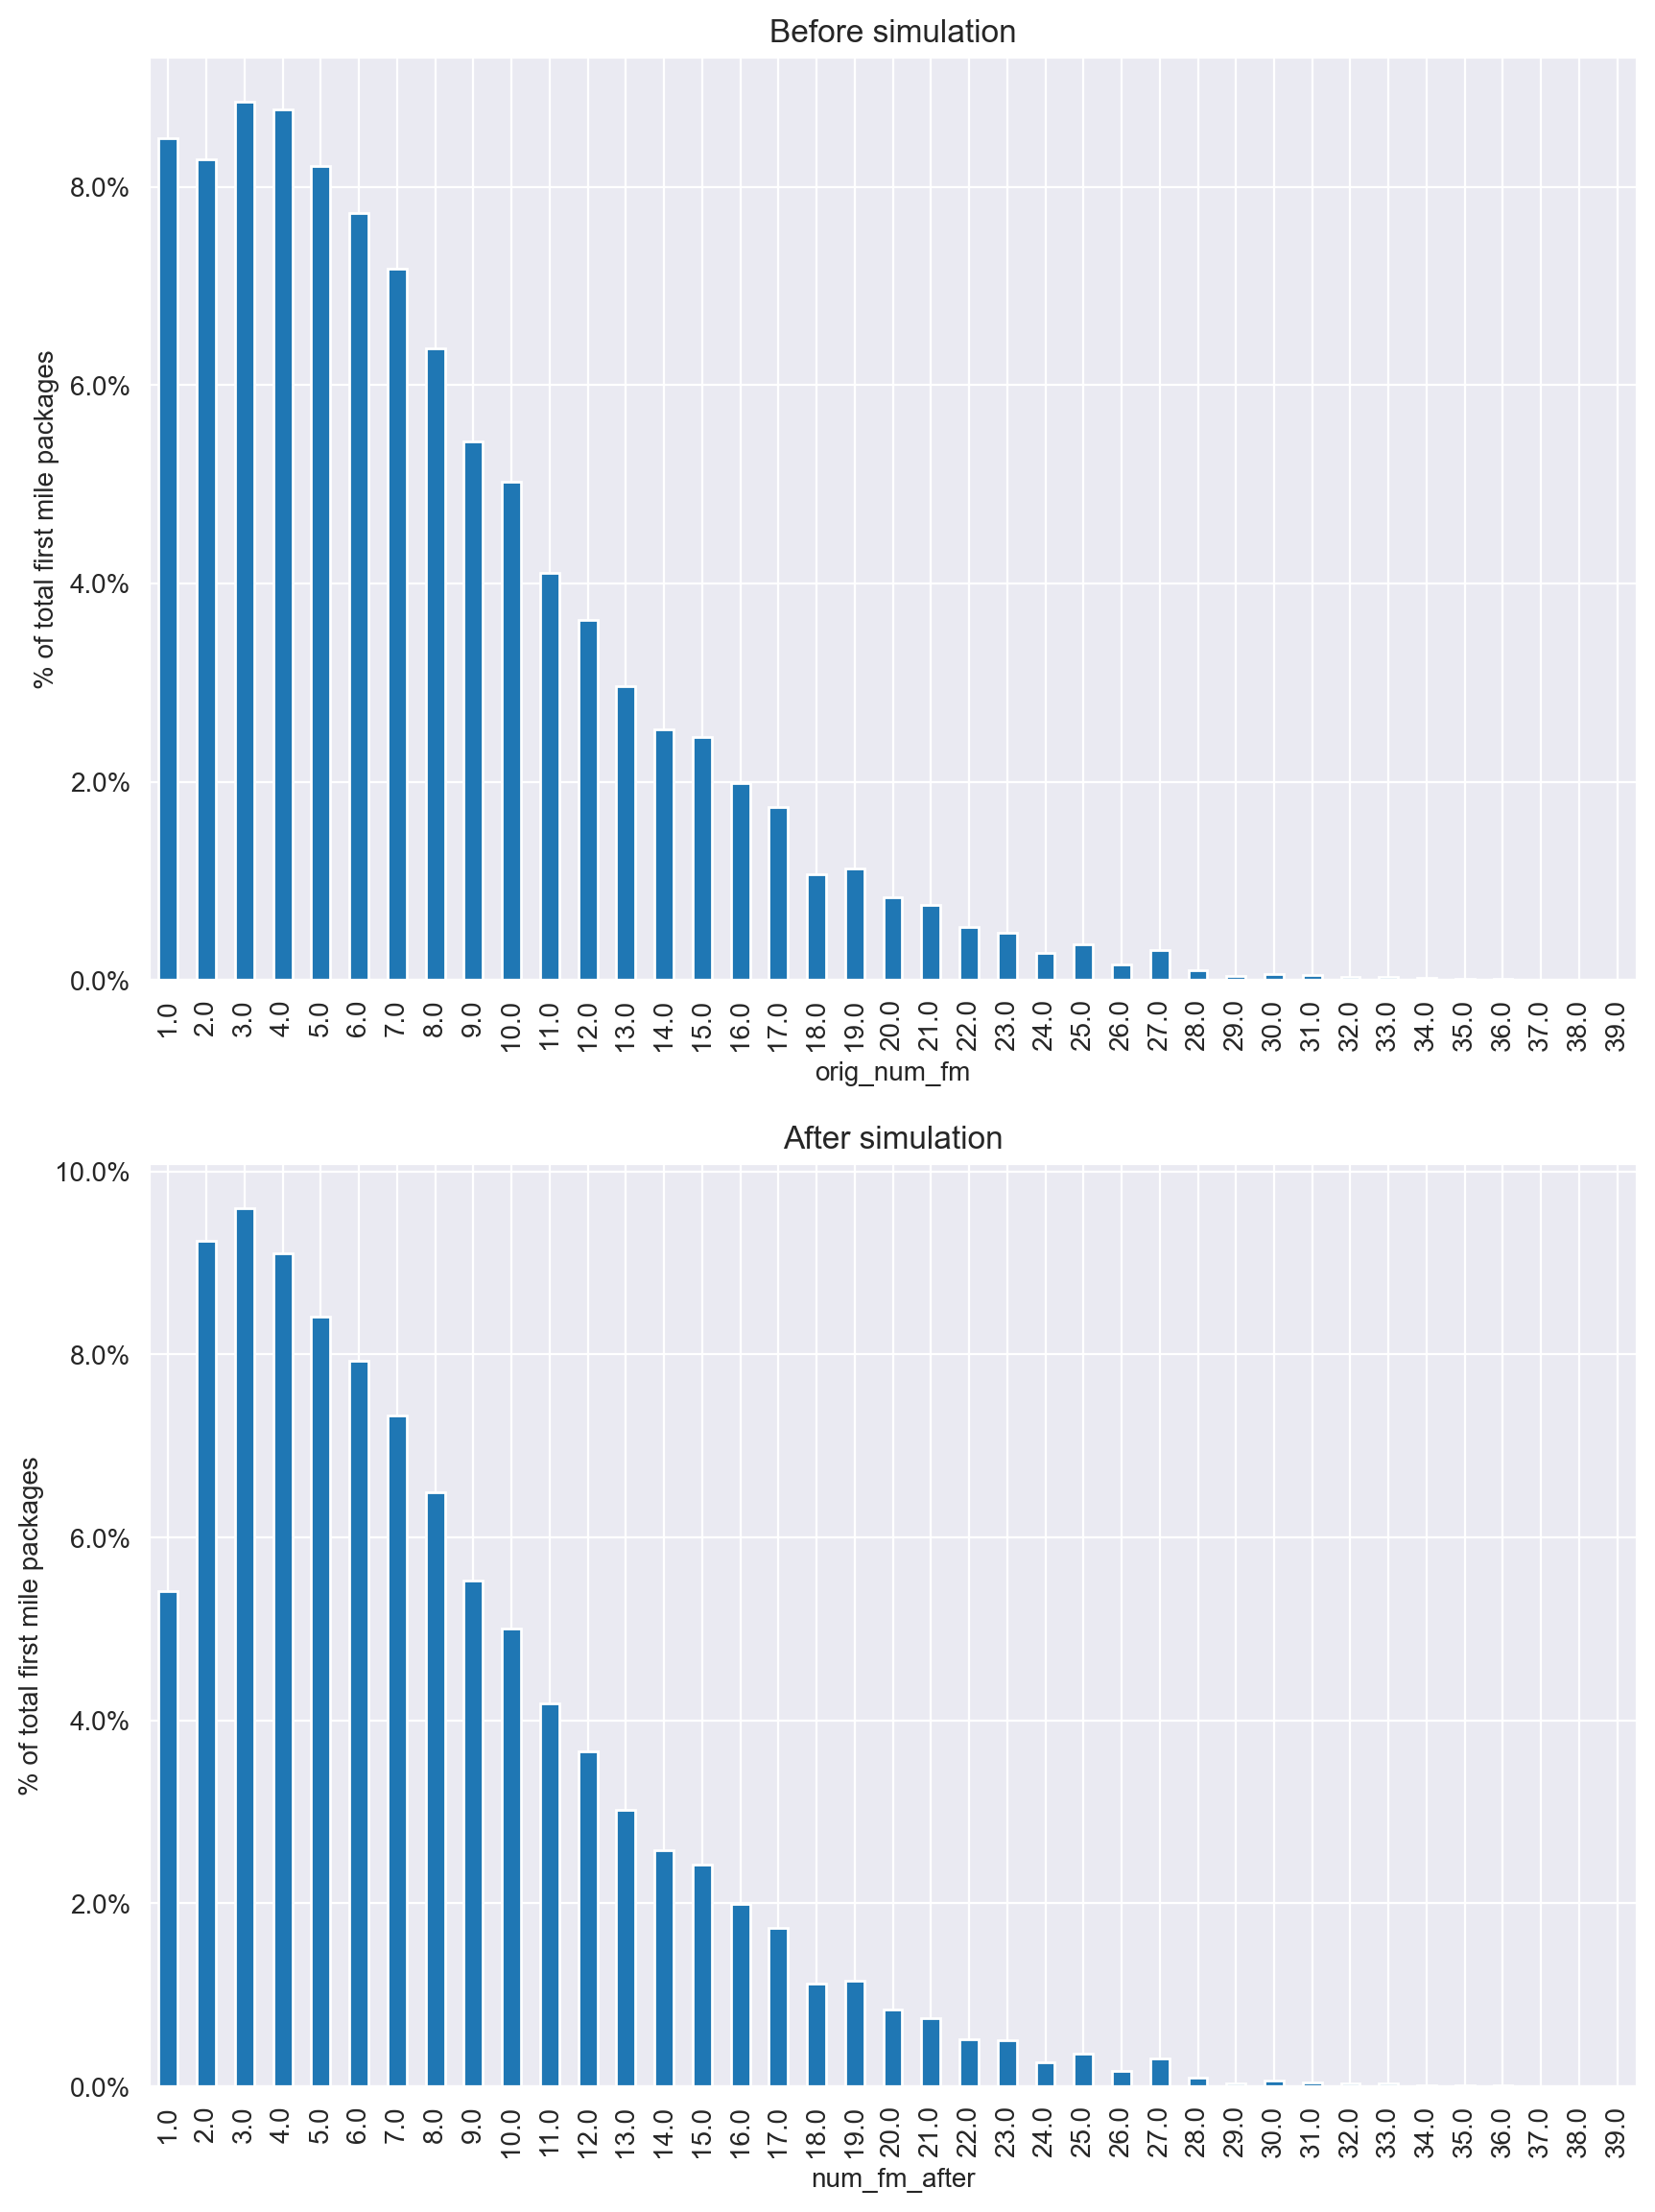

In [36]:
df_after_3, params_3 = simulate_combination(df=df.copy(deep=True), pkg=pkg.copy(deep=True),\
                                        orig_dist_plus=0.5, \
                                        delivered_time_window=(12, 12), last_combined_time_window=(12, 12),)
evaluate_results(df_after_3, params_3)
    

### Examples


In [37]:
combined_to_after_store_id = df_after_3[df_after_3['combined_to_after']==df_after_3['combined_to']][\
                        ['combined_to_after', 'store_id']].drop_duplicates().set_index('combined_to_after')['store_id']


def user_store_dist_after(row):
    if row['combined_to_after']!=row['combined_to']:
        store_id_after = combined_to_after_store_id[row['combined_to_after']]
        #print(store_id_after)
        if store_id_after in user_store_dist_dict[row['user_id']]:
            return user_store_dist_dict[row['user_id']][store_id_after]['user_store_dist']
        else:
            return -1
    else:
        return row['orig_user_store_dist']
    
    
df_after_3.loc[:, 'user_store_dist_after'] = df_after_3.apply(user_store_dist_after, axis=1)
df_after_3.loc[:, 'user_store_dist_diff'] = (df_after_3['user_store_dist_after']-df_after_3['orig_user_store_dist']).apply(abs)
                                                                                           
                                                                                           
                                                                                           

In [38]:
df_after_3[df_after_3['combined_to']!=df_after_3['combined_to_after']]

,first_mile_tracking_id,store_id,combined_to,delivered,delivered_date,user_id,orig_num_fm,last_combined_time,orig_user_store_dist,num_fm_after,combined_to_after,user_store_dist_after,user_store_dist_diff
54,WI001421877735EPC,5d7aaaaf9005447fbf72c241,MMXQP025700437R,1613934486,2021-02-21,5ddb1a6b72d72babd286218a,1.0,1.611731e+09,0.70,3.0,MMXQP025718075R,1.092468,0.392468
83,WI001421342390EPC,5d646600bff2df0d6dfa0028,MMXQP025653618R,1613189385,2021-02-12,5226bebe0e35a81cfd93ebad,1.0,1.611562e+09,0.72,3.0,MMXQP025656804R,0.520502,0.199498
94,WI001422063175EPC,5d5b4810283abc16408fa3fd,MMXQP025724141R,1613470339,2021-02-16,5e0ab3da0208727ccc0af37c,1.0,1.611814e+09,0.16,2.0,MMXQP025736309R,0.267137,0.107137
135,WI001421736750EPC,5de1bf1f39adf2e5e26af49b,MMXQP025673232R,1613203514,2021-02-13,5e27a4dae6f50e1fbf3b95df,1.0,1.611562e+09,2.35,3.0,MMXQP025676605R,2.105798,0.244202
254,WI001420525224EPC,5de82ce4f9d50e3282f2a5a4,MMXQP025422150R,1612599155,2021-02-06,5c702c243fb17b1ef92d2e82,1.0,1.610435e+09,1.29,2.0,MMXQP025437809R,1.560932,0.270932
...,...,...,...,...,...,...,...,...,...,...,...,...,...
205011,WI001422791576EPC,5d89532b22e777103a3f60f6,MMXQP025872998R,1614502970,2021-02-28,5a0c73d92f9e120880a2c3fb,1.0,1.612419e+09,2.60,7.0,MMXQP025877332R,2.745597,0.145597
205209,WI001421739420EPC,5da9fb02e748010480cef193,MMXQP025671700R,1613751194,2021-02-19,57a7a7fb95433329910ae53c,1.0,1.611562e+09,1.24,9.0,MMXQP025657535R,0.833968,0.406032
205227,WI001420917336EPC,5ee1211829e7865ea5ccafab,MMXQP025467575R,1612599141,2021-02-06,5f8dbdbd4bfbbe3b60d02601,1.0,1.610532e+09,0.00,3.0,MMXQP025438781R,0.039004,0.039004
205255,WI001421891555EPC,5e4ab78c6e4107803a4ab8c5,MMXQP025741207R,1613984380,2021-02-22,59f7dcb784d5a0b3349450a2,1.0,1.611814e+09,0.49,3.0,MMXQP025741241R,0.232937,0.257063


In [39]:
df_after_3[df_after_3['combined_to_after']=='MMXQP025718075R'].to_clipboard()

In [40]:
df_after_3[df_after_3['combined_to_after']=='MMXQP025877332R'].to_clipboard()

# Estimate impact on logistics profit

In [41]:
df.shape

(177288, 9)

In [42]:
df_fm_profit = pd.merge(df, fm_tracking_id_profit, how='left', on='first_mile_tracking_id')
df_fm_profit.head()

,first_mile_tracking_id,store_id,combined_to,delivered,delivered_date,user_id,orig_num_fm,last_combined_time,orig_user_store_dist,logistics_profit_cny
0,WI001421894565EPC,5e3c91c74a3b21b05702ad85,MMXQP025708387R,1614531564,2021-02-28,5dfc5865ffd455288ee02aaf,6.0,1.611731e+09,3.20,4.467222
1,WI001420828392EPC,5df2b3b08cf3d42cc4082eb4,MMXQP025452647R,1613185409,2021-02-12,5c285c55b9d9050dd872331d,16.0,1.610349e+09,7.94,11.070605
2,WI001422425590EPC,5da8fe4d567fca014822e07b,MMXQP025805962R,1614546163,2021-02-28,5a7e755d900e9338372030c0,9.0,1.612159e+09,16.66,0.437624
3,WI001421525716EPC,5e39eb085f6ba7098098e468,MMXQP025616249R,1613177905,2021-02-12,597be87345911a7cfb252b98,5.0,1.611303e+09,2.51,13.178636
4,WI001421246115EPC,5d02fde7d7f81715b7affe9d,MMXQP025568804R,1612429636,2021-02-04,5a8c62041a8c69e0d4836587,8.0,1.613923e+09,6.89,0.771295


In [43]:
df_fm_profit['logistics_profit_cny'].describe()

count    177288.000000
mean          1.156864
std          10.055184
min        -392.150000
25%          -0.284751
50%           1.441456
75%           3.581933
max         547.549586
Name: logistics_profit_cny, dtype: float64

In [44]:
df_fm_profit['logistics_profit_cny'].sum()

205098.09994254462

In [45]:
df_fm_profit.groupby(['orig_num_fm'])['logistics_profit_cny'].agg(['sum', 'mean', 'count'])

,sum,mean,count
orig_num_fm,,,
1.0,-215627.130000,-14.328336,15049
2.0,-63332.309413,-4.315366,14676
3.0,-15515.173712,-0.987850,15706
4.0,13894.890850,0.892644,15566
5.0,30408.516652,2.088210,14562
6.0,40826.031986,2.975658,13720
7.0,44217.012616,3.475087,12724
8.0,45752.873829,4.051078,11294
9.0,40430.779167,4.198419,9630
